<a href="https://colab.research.google.com/github/Ohsoo46/AIFFEL_QUEST/blob/main/4SEC_2Rock_Paper_Scissors_Project_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.19.0
2.0.2


In [ ]:
import os
from PIL import Image

folder = "/content/drive/MyDrive/4SEC/rock"
file_list = os.listdir(folder)

# 이미지 파일 하나 선택
first_image_path = os.path.join(folder, file_list[0])
print("확인할 이미지:", first_image_path)

img = Image.open(first_image_path)
print("이미지 크기:", img.size)  # (width, height)


확인할 이미지: /content/drive/MyDrive/4SEC/rock/86.jpg
이미지 크기: (224, 224)


In [ ]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [ ]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")

	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")

	print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/content/drive/MyDrive/4SEC/scissor"
resize_images(image_dir_path)
print("가위 이미지 resize 완료!")

0  images to be resized.
0  images resized.
가위 이미지 resize 완료!


In [ ]:



	# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/content/drive/MyDrive/4SEC/rock"
resize_images(image_dir_path)


print("바위 이미지 resize 완료!")



0  images to be resized.
0  images resized.
바위 이미지 resize 완료!


In [ ]:

	# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/content/drive/MyDrive/4SEC/paper"
resize_images(image_dir_path)

print("보 이미지 reaize 완료")

0  images to be resized.
0  images resized.
보 이미지 reaize 완료


In [ ]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/content/drive/MyDrive/4SEC/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 0 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


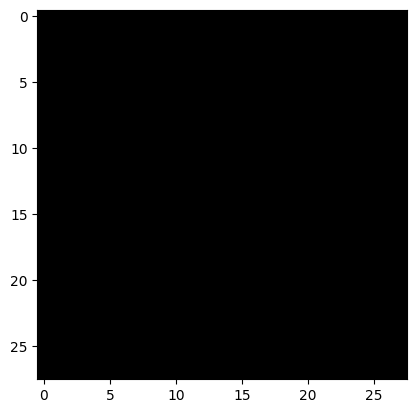

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


num_classes = 3  # rock / scissor / paper

model = keras.models.Sequential()

# 1층: 합성곱 + 풀링
model.add(keras.layers.Conv2D(32, (3,3),
                              activation='relu',
                              input_shape=(28,28,3)))   # ← RPS는 3채널
model.add(keras.layers.MaxPool2D(2,2))

# 2층: 합성곱 + 풀링
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# 3층: 평탄화 + 완전연결층
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))

# 출력층: 3개 클래스, softmax
model.add(keras.layers.Dense(num_classes, activation='softmax'))

# 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,051 (476.76 KB)

 Trainable params: 122,051 (476.76 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
(x_data, y_data) = load_data(image_dir_path) # 1) 데이터 로드


학습데이터(x_train)의 이미지 개수는 0 입니다.


In [ ]:
x_data = x_data.astype("float32") / 255.0  # 2) 정규화


In [ ]:
# 3) train/test 분리

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data,
    test_size=0.2,
    shuffle=True,
    random_state=42
)



In [ ]:
# 4) CNN 학습
model.fit(x_train, y_train, epochs=15, validation_split=0.2)

Epoch 1/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 1.0000 - loss: 0.8137 - val_accuracy: 1.0000 - val_loss: 0.8090
Epoch 2/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 1.0000 - loss: 0.8075 - val_accuracy: 1.0000 - val_loss: 0.8029
Epoch 3/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 1.0000 - loss: 0.8015 - val_accuracy: 1.0000 - val_loss: 0.7969
Epoch 4/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 1.0000 - loss: 0.7954 - val_accuracy: 1.0000 - val_loss: 0.7909
Epoch 5/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 1.0000 - loss: 0.7895 - val_accuracy: 1.0000 - val_loss: 0.7849
Epoch 6/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 1.0000 - loss: 0.7835 - val_accuracy: 1.0000 - val_loss: 0.7790
Epoch 7/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 1.0000 - loss: 0.7776 - val_accuracy: 1.0000 - val_loss: 0.7732
Epoch 8/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 1.0000 - loss: 0.7718 - val_accuracy: 1.0000 - val_loss: 0.767

In [ ]:
# 시험용 데이터 평가
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("시험용 데이터 인식률(test_accuracy):", test_acc)


시험용 데이터 인식률(test_accuracy): 1.0
